In [1]:
# digesting fairfax county data

# source : https://www.fcpod.org/pages/crime-data

# for FOIA requests: FCPDFOIA@fairfaxcounty.gov
# resource https://www.fairfaxcounty.gov/police/servicesiz/foia
# requires name, legal address, and to identify requested records with reasonable specificity
# cost: $3 for a complete report. Copies are .13/pg b&w letter, $.14 for ledger, colors are .19 or .20/pg
# 911 recordings dpscrecordsrequest@fairfaxcounty.gov

# weekly reports are downloadable wget https://www.fairfaxcounty.gov/apps/pfsu/api/file/crimereportsfromsp


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('data/CrimeReports.csv',header=None)
df.columns=['num','code','long_code','date','number','address','county','state','zip']

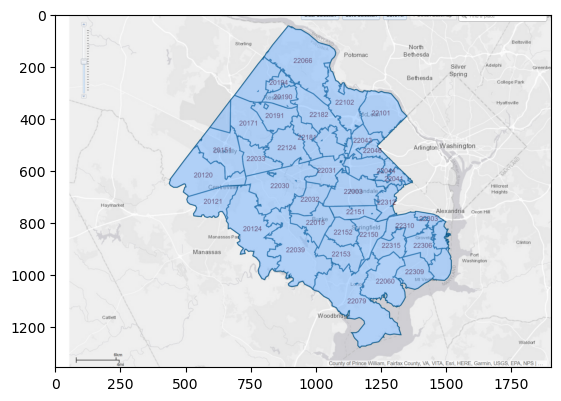

In [9]:
fairfax = plt.imread('data/Fairfax.png')
plt.imshow(fairfax)

In [10]:
rois=pd.read_table('data/RoiSet.txt')

,,Label,Area,Mean,Min,Max,X,Y,XM,YM
0,1,Screenshot (51).png:22066,0,207,207,207,951.0,181.0,951,181
1,2,Screenshot (51).png:20194,0,130,130,130,859.0,260.0,859,260
2,3,Screenshot (51).png:22102,0,207,207,207,1120.0,344.0,1120,344
3,4,Screenshot (51).png:22101,0,207,207,207,1250.0,382.0,1250,382
4,5,Screenshot (51).png:22182,0,207,207,207,1010.0,385.0,1010,385
5,6,Screenshot (51).png:20190,0,208,208,208,873.0,318.0,873,318
6,7,Screenshot (51).png:20191,0,207,207,207,841.0,391.0,841,391
7,8,Screenshot (51).png:20171,0,207,207,207,738.0,418.0,738,418
8,9,Screenshot (51).png:20151,0,121,121,121,643.0,523.0,643,523
9,10,Screenshot (51).png:20120,0,210,210,210,568.0,618.0,568,618


In [56]:
rois.Label=rois.Label.str.split(':',expand=True)[1]

KeyError: 1

In [57]:
zipcodes=rois[['Label','X','Y']]
zipcodes.columns=['zipcode','x','y']
zipcodes

,zipcode,x,y
0,22066,951.0,181.0
1,20194,859.0,260.0
2,22102,1120.0,344.0
3,22101,1250.0,382.0
4,22182,1010.0,385.0
5,20190,873.0,318.0
6,20191,841.0,391.0
7,20171,738.0,418.0
8,20151,643.0,523.0
9,20120,568.0,618.0


In [135]:
tst = df.code[0]
tst.split('-')[0]

'SERV'

In [142]:
np.isnan(np.nan)

True

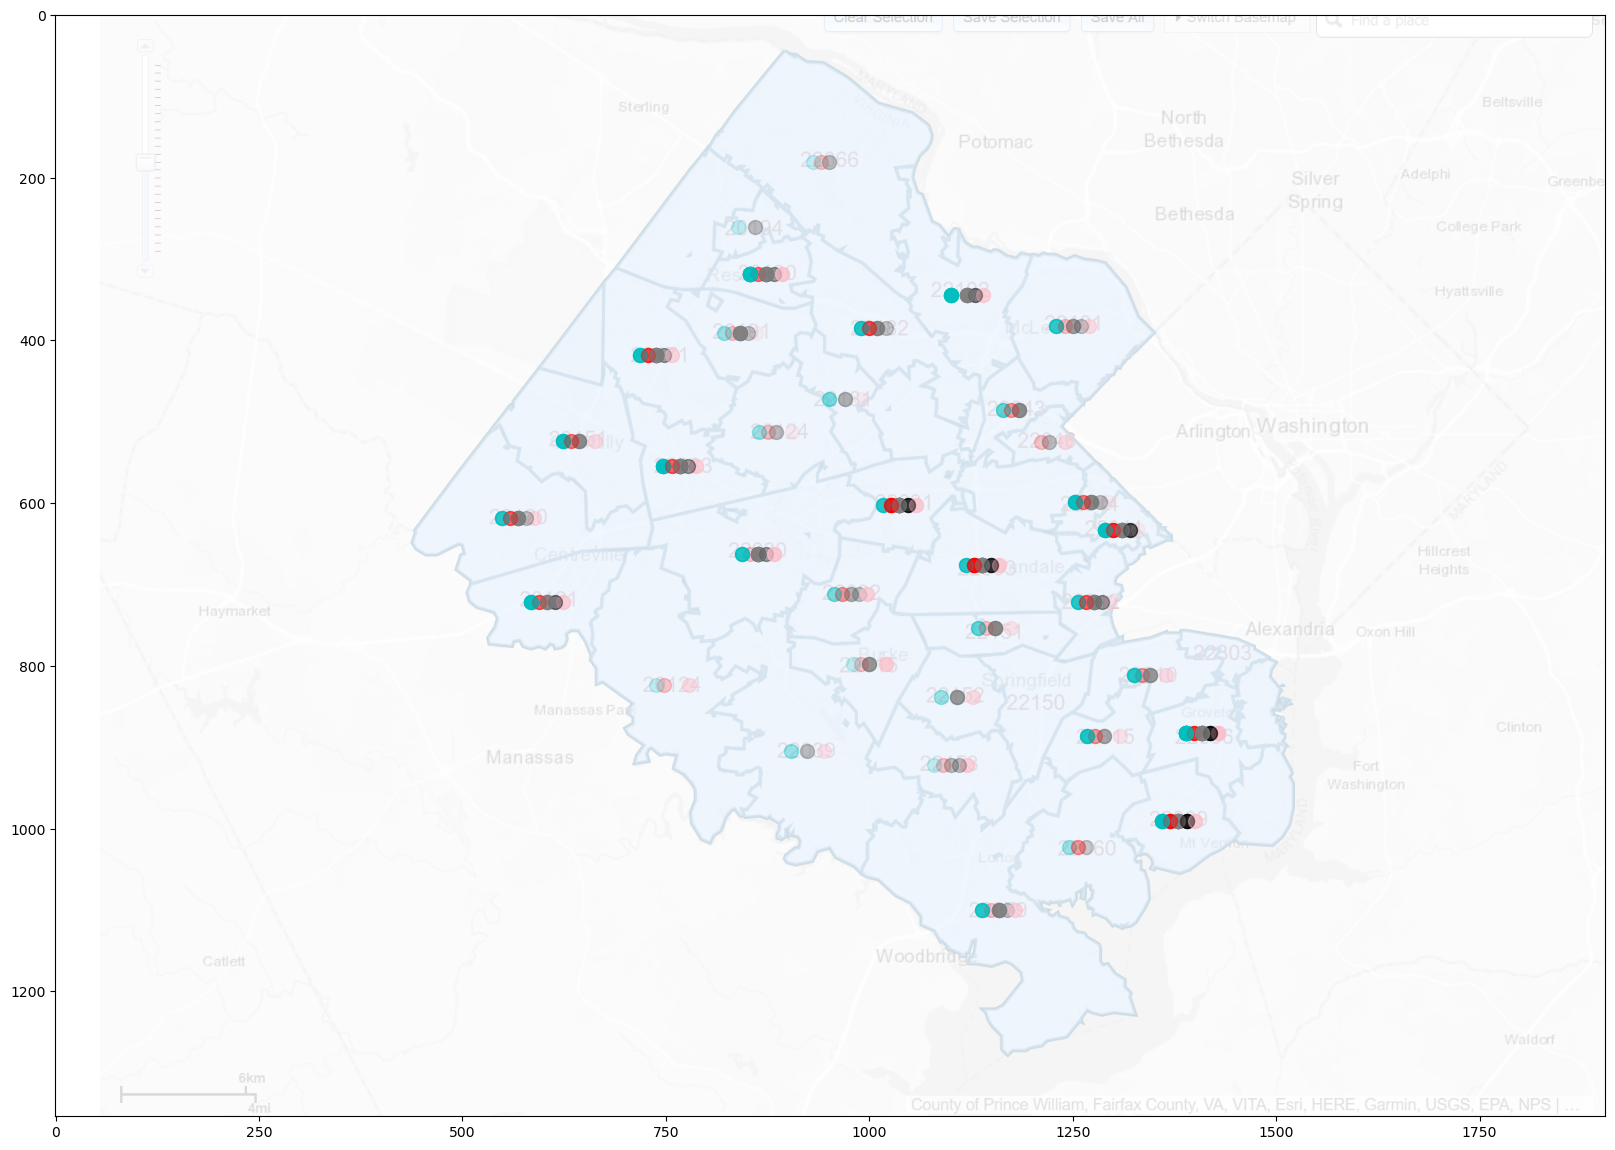

In [144]:
plt.figure(figsize=(20,20))
plt.imshow(fairfax,alpha=0.2)
for idx in df.index:
    val=df.zip[idx]
    if not np.isnan(val):
        code=df.code[idx].split('-')[0]
        if code in ['ABC','DISORD','DRUG','DRUNK']:
            color='k'
            add=10
        elif code in ['ABDCT','ASSLT','SEX']:
            color='r'
            add=-10
        elif code in ['WEAP','ANML']:
            color='pink'
            add=20
        elif code in ['TRES','ROB','LARC','FRAUD','FORG','FAM','EXTOR','DEST','CODE','BURG']:
            color='c'
            add=-20
        else:
            color='gray'
            add=0
        plt.scatter(zipcodes.x[zipcodes.zipcode==int(val)]+add,zipcodes.y[zipcodes.zipcode==int(val)],alpha=0.2,c=color,s=100)


In [108]:
np.unique(df.code.str.split('-',expand=True)[0])

array(['ABC', 'ABDCT', 'ANML', 'ASSLT', 'AUTO', 'BURG', 'CODE', 'COMP',
       'DEST', 'DISORD', 'DRUG', 'DRUNK', 'EXTOR', 'FAM', 'FORG', 'FRAUD',
       'LARC', 'OTHER', 'PARK', 'PORN', 'PUB', 'ROB', 'SERV', 'SEX',
       'SUSP', 'TAMP', 'TAX', 'TELE', 'TRES', 'UNCLASSED', 'WARR', 'WEAP',
       ']'], dtype=object)

In [91]:
unique_basecodes=np.unique(df.code.str.split('-',expand=True)[0])

In [106]:
for val in df.code:
    if 'PUB' in val:
        print(val)

PUB-90Z-5
PUB-90Z-6
PUB-90Z-5
PUB-90Z-6
PUB-90Z-6


In [ ]:
# CODE 90Z 4 may be tresspass of real property

In [109]:
len(unique_basecodes)

33

In [110]:
colors=['k','r','c','r','b','b','b','k','b','k','k','k','b','b','b','b','b','gray','o','b','gray','b','gray','r','gray','gray','gray','gray','b','gray','gray','pink']

In [114]:
for val in np.arange(0,32):
    print(unique_basecodes[val],colors[val])

ABC k
ABDCT r
ANML c
ASSLT r
AUTO b
BURG b
CODE b
COMP k
DEST b
DISORD k
DRUG k
DRUNK k
EXTOR b
FAM b
FORG b
FRAUD b
LARC b
OTHER gray
PARK o
PORN b
PUB gray
ROB b
SERV gray
SEX r
SUSP gray
TAMP gray
TAX gray
TELE gray
TRES b
UNCLASSED gray
WARR gray
WEAP pink


']'